In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
nums_heads = [1, 2, 3, 6, 12]
hid_dims = [24, 48, 96, 192, 384]
#num_head = nums_heads[task_id // 5]
#hid_dim = hid_dims[task_id % 5]
lr = 1e-3
data = torch.load('../outputs/exp-0-1-0.pt', weights_only=False)
train_losses = torch.zeros(5, 5, len(data['train_losses']))
eval_losses = torch.zeros(5, 5, len(data['eval_losses']))
eval_log = 100

for task_id in range(25):
    data = torch.load(f'../outputs/exp-0-1-{task_id}.pt', weights_only=False)
    train_losses[task_id // 5, task_id % 5] = torch.tensor(data['train_losses'])
    eval_losses[task_id // 5, task_id % 5] = torch.tensor(data['eval_losses'])

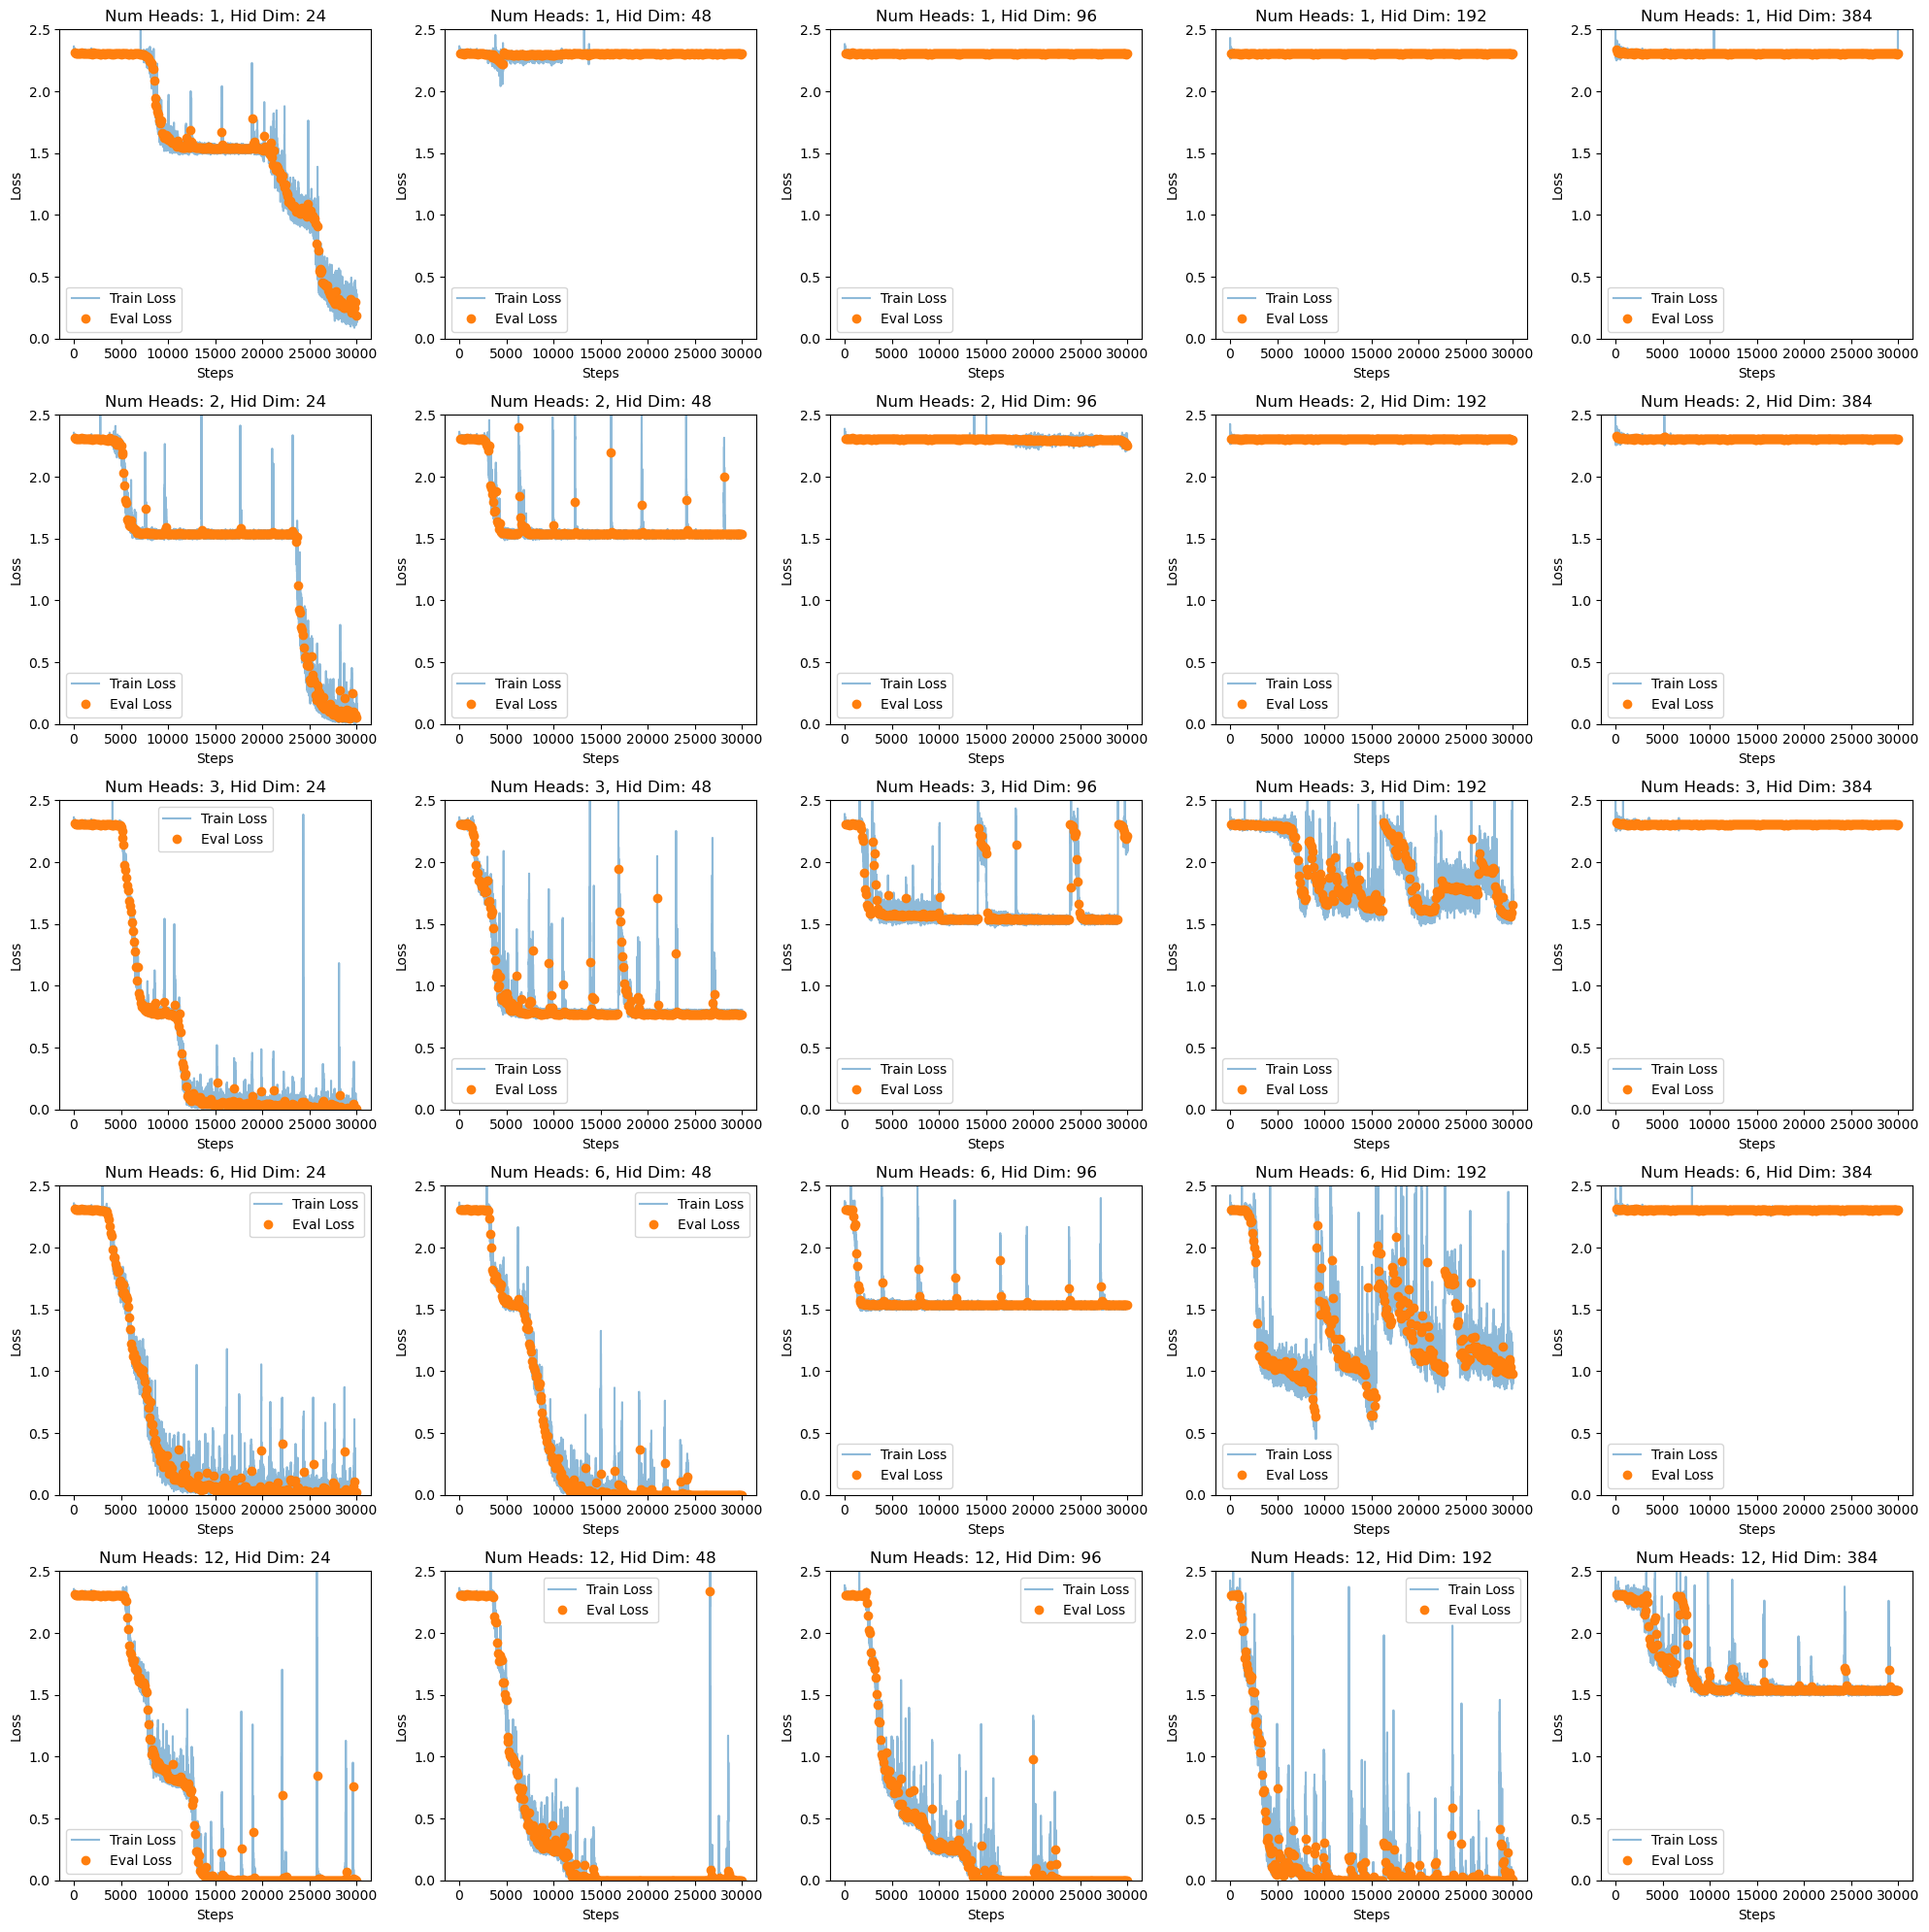

In [3]:
# 5 x 5 subplots
fig, axs = plt.subplots(5, 5, figsize=(20, 20))
for i in range(5):
    for j in range(5):
        ax = axs[i, j]
        ax.plot(range(1, train_losses.shape[2] + 1), train_losses[i, j].numpy(), alpha=0.5, label='Train Loss')
        ax.plot(torch.arange(1, eval_losses.shape[2] + 1) * eval_log, eval_losses[i, j].numpy(), 'o', label='Eval Loss')
        ax.set_title(f'Num Heads: {nums_heads[i]}, Hid Dim: {hid_dims[j]}')
        ax.set_xlabel('Steps')
        ax.set_ylabel('Loss')
        ax.legend()
        ax.set_ylim(0, 2.5)
plt.tight_layout()

Text(0, 0.5, 'Loss')

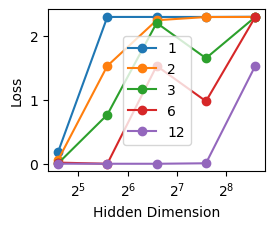

In [4]:
plt.figure(figsize=(2.8, 2.1))
for i in range(5):
    plt.plot(hid_dims, eval_losses[i, :, -1].numpy(), 'o-',label=f'{nums_heads[i]}')
plt.legend()
plt.xscale('log', base=2)
plt.xlabel('Hidden Dimension')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

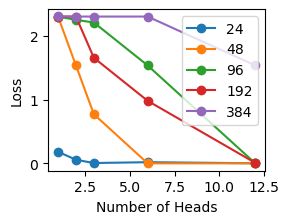

In [5]:
plt.figure(figsize=(2.8, 2.1))
for j in range(5):
    plt.plot(nums_heads, eval_losses[:, j, -1].numpy(), 'o-',label=f'{hid_dims[j]}')
plt.legend()
#plt.xscale('log', base=2)
plt.xlabel('Number of Heads')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

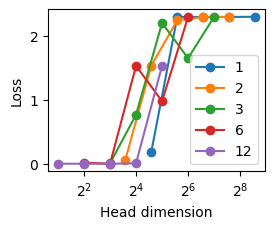

In [6]:
plt.figure(figsize=(2.8, 2.1))
for i in range(5):
    plt.plot(torch.tensor(hid_dims).numpy() / nums_heads[i], eval_losses[i, :, -1].numpy(), 'o-',label=f'{nums_heads[i]}')
plt.legend()
plt.xscale('log', base=2)
plt.xlabel('Head dimension')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

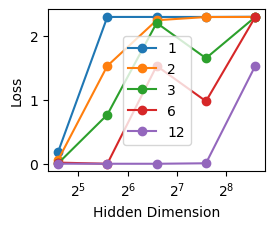

In [7]:
plt.figure(figsize=(2.8, 2.1))
for i in range(5):
    plt.plot(hid_dims, eval_losses[i, :, -1].numpy(), 'o-',label=f'{nums_heads[i]}')
plt.legend()
plt.xscale('log', base=2)
plt.xlabel('Hidden Dimension')
plt.ylabel('Loss')

([<matplotlib.axis.YTick at 0x16c669410>,
 [Text(0, 0, '1'),
  Text(0, 1, '2'),
  Text(0, 2, '3'),
  Text(0, 3, '6'),
  Text(0, 4, '12')])

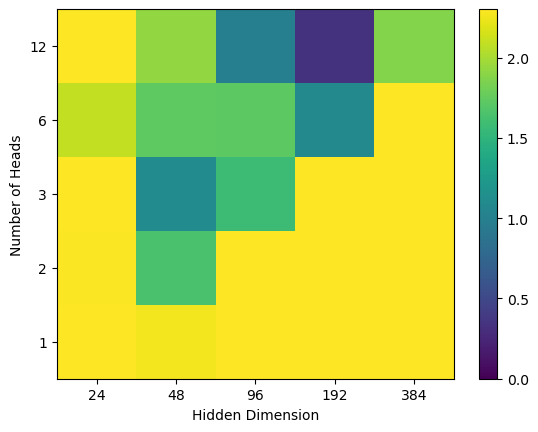

In [8]:
# 5 x 5 heatmap of the final eval loss
plt.imshow(eval_losses[:, :, 39].numpy(), 
           origin='lower', cmap='viridis', aspect='auto', vmin=0)
plt.colorbar()
plt.xlabel('Hidden Dimension')
plt.xticks(ticks=range(5), labels=hid_dims)
plt.ylabel('Number of Heads')
plt.yticks(ticks=range(5), labels=nums_heads)

([<matplotlib.axis.YTick at 0x30d077fd0>,
 [Text(0, 0, '1'),
  Text(0, 1, '2'),
  Text(0, 2, '3'),
  Text(0, 3, '6'),
  Text(0, 4, '12')])

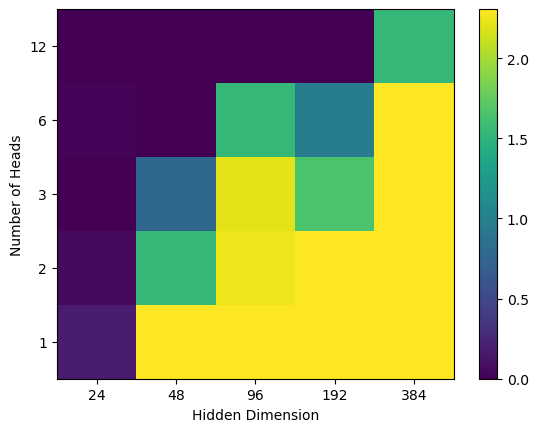

In [9]:
# 5 x 5 heatmap of the final eval loss
plt.imshow(eval_losses[:, :, -1].numpy(), 
           origin='lower', cmap='viridis', aspect='auto', vmin=0)
plt.colorbar()
plt.xlabel('Hidden Dimension')
plt.xticks(ticks=range(5), labels=hid_dims)
plt.ylabel('Number of Heads')
plt.yticks(ticks=range(5), labels=nums_heads)